<a href="https://colab.research.google.com/github/AngeHdz/ProyectoIntegrador/blob/main/Avance1_35_Equipo_EDA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.enroll-u.com/_i/1/7/7/4ecd9be0-eec4-11e9-9992-0231b47980f0.jpeg" width="256px">

### MATERIA
Proyecto Integrador

### Profesor  
Dra. Grettel Barceló Alonso

Dr. Luis Eduardo Falcón Morales
### Tutor  
Dra. María de la Paz Rico Fernández

### Nombre y Matrícula de los Integrantes del Equipo  
- A01793810 - Jerson David Pérez Contreras
- A01228278 - Norma de los Ángeles García López
- A01794256 - Angel De Jesús Hernández Pascual

  
### Actividad  
Avance 1. Análisis exploratorio de datos

### Fecha de Realización  
5 de Mayo del 2024

# Origen de las imagenes

Las imagenes del dataset fueron pre procesados atravez de una aplicacion que fue desarrollada en Ametek para el procesamiento de imagenes. Esta aplicacion remueve todas las impuresas de la captura, la cual se realiza a travez de una camara marca Allied en el equipo de prueba de cosmetico del modelo HVAC.
Esta aplicacion nos auxilia para preprocesar la imagen y para etiquetarlas.


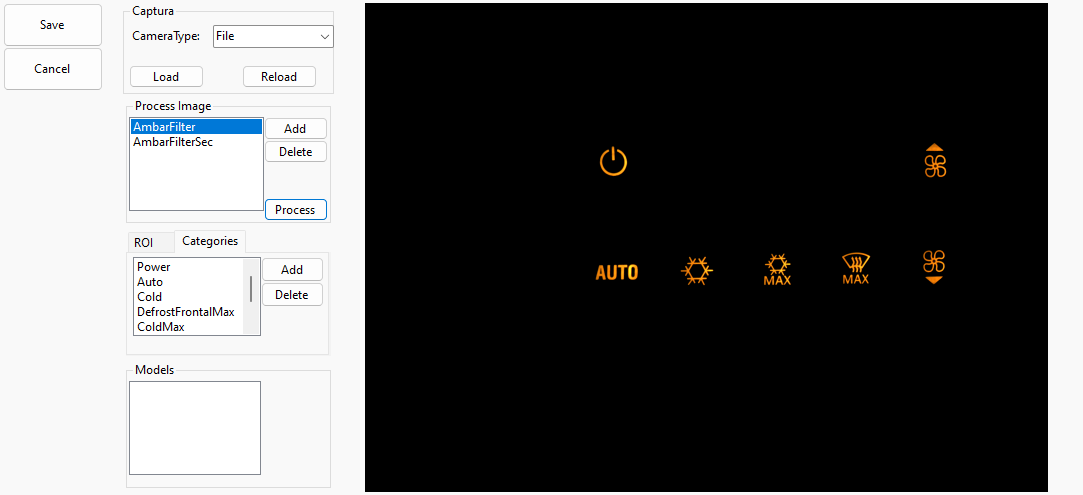



# Etiquetado de Imagenes

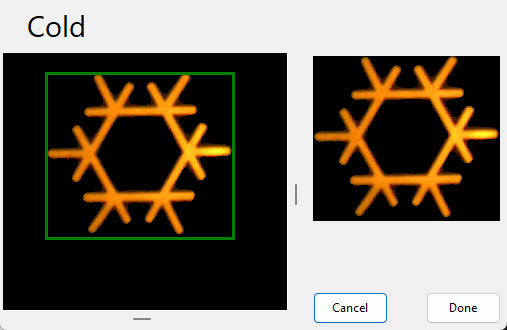

El dataset se alojó en kaglee para su facil tratamiento en equipo:

[Kaglee Dataset](https://www.kaggle.com/datasets/angelhdza01794256/telltales)

# Análisis

A continuacion se importan las librerias a utilizarse

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [ ]:
# Se importan las librerias de Kaggle y Google Colab
!pip install kaggle
from google.colab import files
files.upload()

Saving kaggle.json to kaggle (2).json


{'kaggle (2).json': b'{"username":"angelhdza01794256","key":"c779ce8b4a457ac6614173a90b83d9c5"}'}

In [ ]:
# Se descarga el dataset
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c test-tell-tales

mkdir: cannot create directory ‘/root/.kaggle’: File exists
Traceback (most recent call last):
  File "/usr/local/bin/kaggle", line 8, in <module>
    sys.exit(main())
  File "/usr/local/lib/python3.10/dist-packages/kaggle/cli.py", line 54, in main
    out = args.func(**command_args)
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 1002, in competition_download_cli
    self.competition_download_files(competition, path, force,
  File "/usr/local/lib/python3.10/dist-packages/kaggle/api/kaggle_api_extended.py", line 965, in competition_download_files
    url = response.retries.history[0].redirect_location.split('?')[0]
IndexError: tuple index out of range


In [ ]:
#Se realiza descomprecion de archivos
!unzip /content/test-tell-tales.zip

Archive:  /content/test-tell-tales.zip
error [/content/test-tell-tales.zip]:  start of central directory not found;
  zipfile corrupt.
  (please check that you have transferred or created the zipfile in the
  appropriate BINARY mode and that you have compiled UnZip properly)


A continuacion cargamos las imagenes para realizar su análisis
Obteniendo que en este primer realease de imagenes tenemos:
- 120 imagenes
- 8 clases

In [ ]:
data_dir = '/content/Train'
batch_size = 5
train = tf.keras.utils.image_dataset_from_directory(
  data_dir,
  validation_split=0.2,
  subset="training",
  seed=123,
  batch_size=batch_size)


Found 120 files belonging to 8 classes.
Using 96 files for training.


Se imprime las clases que se encuentran en el Dataset

In [ ]:
class_names = train.class_names
print(class_names)

['Auto', 'Cold', 'ColdMax', 'DefrostFrontalMax', 'DefrostRear', 'FanDown', 'FanUp', 'Power']


##Visualización de imágenes:
Se imprimen 4 imagenes aleatorias del Dataset

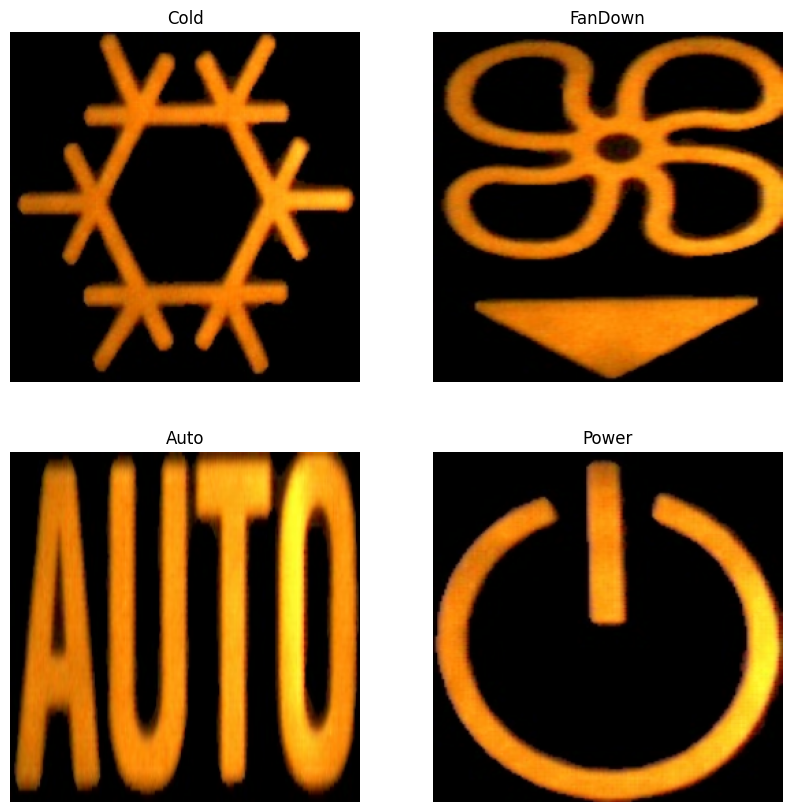

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
for images, labels in train.take(1):
  for i in range(4):
    ax = plt.subplot(2, 2, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

## Exploración de la distribución de píxeles

En la distribución de píxeles, podemos confirmar que la mayoría de las imágenes de entrenamiento exhiben una tonalidad oscura, principalmente debido al fondo negro que predomina en la mayoría de las imágenes. También se observa una frecuencia destacada en el píxel 250, lo que sugiere la presencia de tonalidades brillantes o de alto contraste. Este fenómeno se atribuye a la manera en que los iconos están representados, así como a la iluminación que reciben.

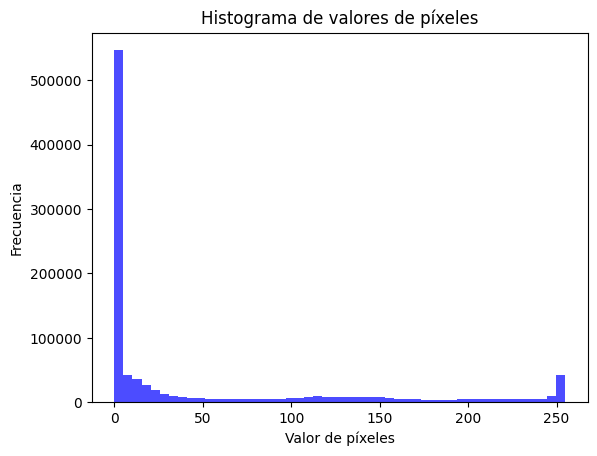

In [ ]:
pixel_values = []
for images, _ in train.take(1):
    pixel_values.extend(np.array(images).flatten())

plt.hist(pixel_values, bins=50, color='blue', alpha=0.7)
plt.xlabel('Valor de píxeles')
plt.ylabel('Frecuencia')
plt.title('Histograma de valores de píxeles')
plt.show()

## Exploración de la resolución y el tamaño de las imágenes

Las imágenes tienen una resolución de 256x256 píxeles y se cargaron en lotes de tamaño 5. Esto significa que cada imagen en el conjunto de datos tiene una dimensión de 256 píxeles de ancho y 256 píxeles de alto

In [ ]:
for images, _ in train.take(1):
    print('Resolución de la imagen:', images.shape[1:-1])
    print('Tamaño del lote:', images.shape[0])

Resolución de la imagen: (256, 256)
Tamaño del lote: 5


## Exploración de la variabilidad de clases
En la base de entrenamiento, el 80% de las imágenes se seleccionan aleatoriamente para el entrenamiento. La clase "Auto" tiene la mayor cantidad de imágenes, con 15 en total, mientras que la clase "FanUp" tiene la menor cantidad, con 9 imágenes.

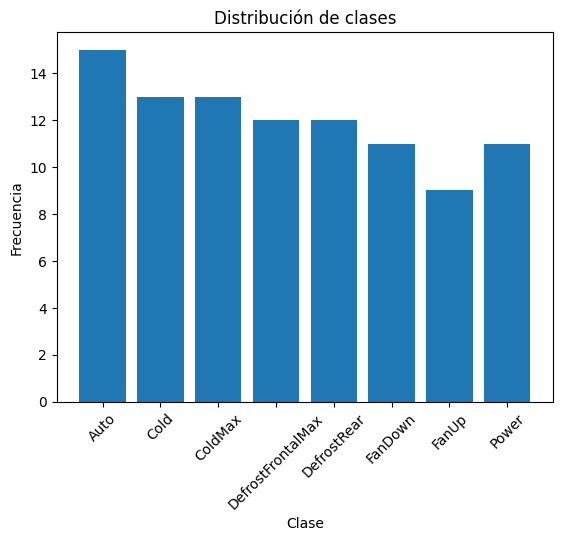

In [ ]:
class_names = train.class_names
class_counts = [0] * len(class_names)
for _, labels in train:
    for label in labels:
        class_counts[int(label)] += 1

plt.bar(class_names, class_counts)
plt.xlabel('Clase')
plt.ylabel('Frecuencia')
plt.title('Distribución de clases')
plt.xticks(rotation=45)
plt.show()

##Análisis de bordes y contornos

En el analsis de contornos se puede apreciar una buena distincion en las imagenes

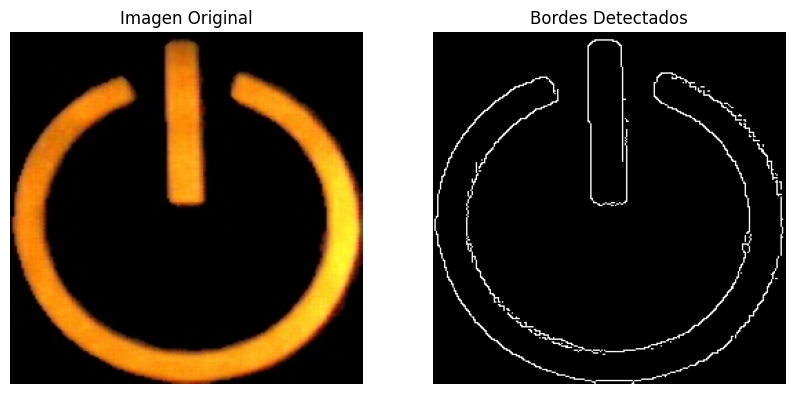

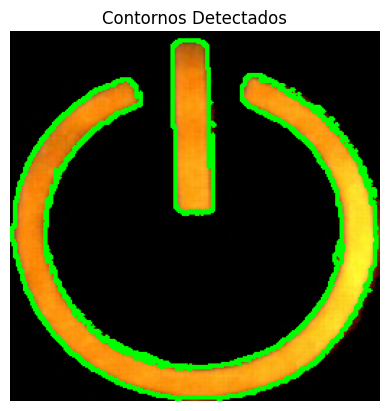

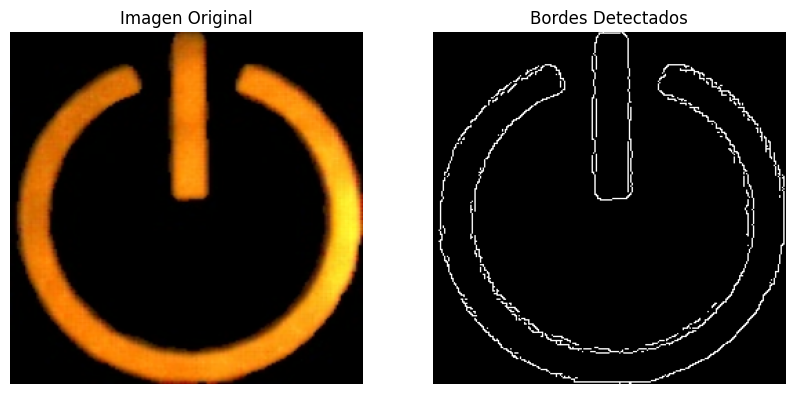

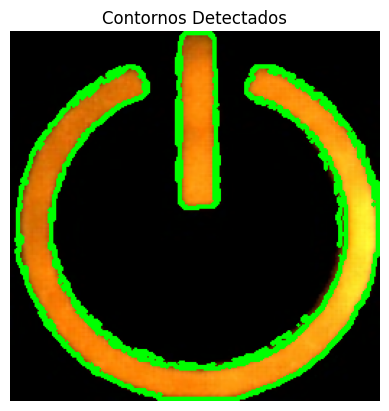

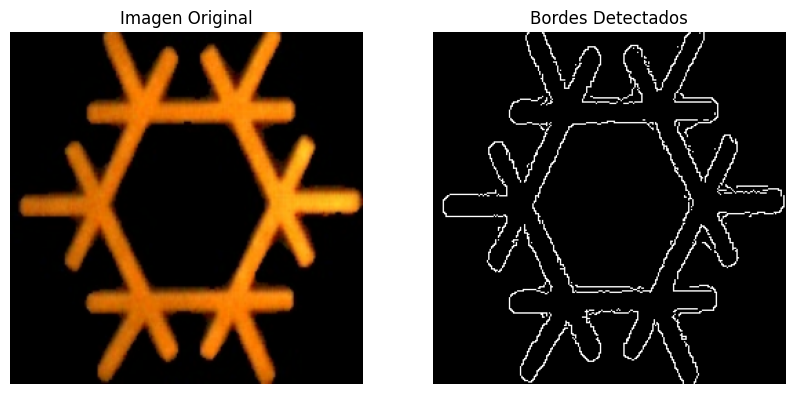

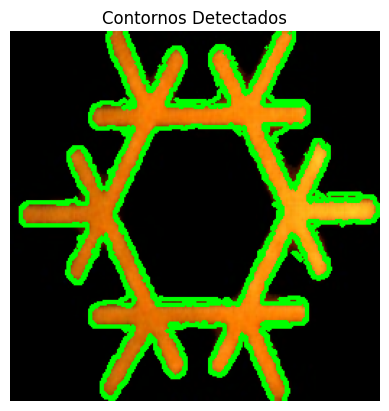

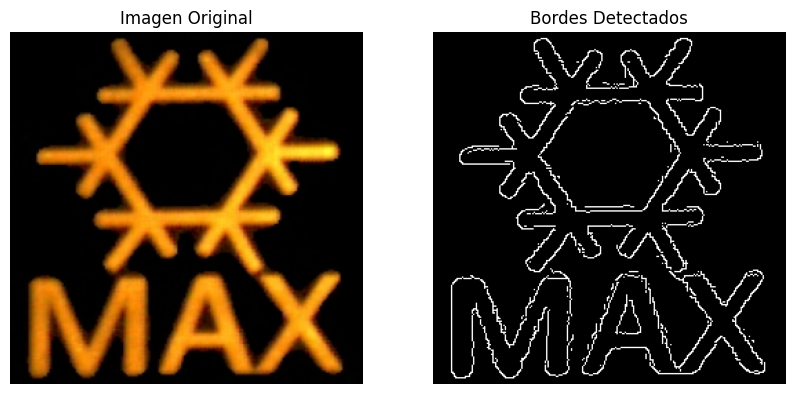

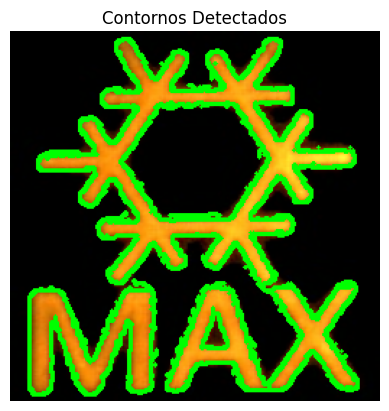

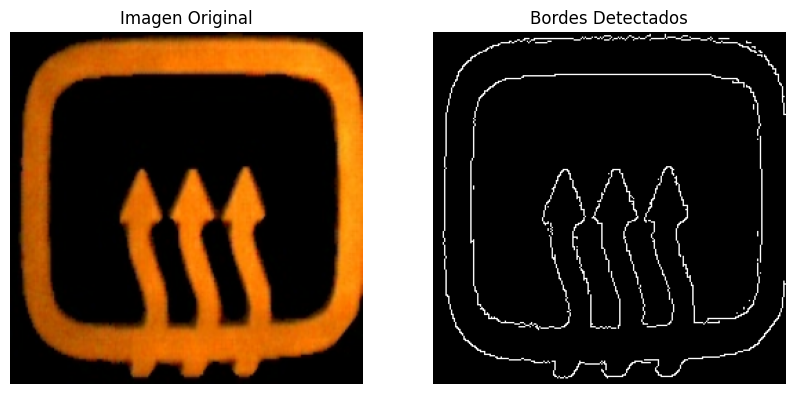

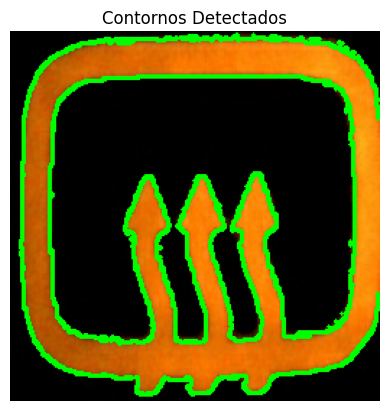

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt


def edge_and_contour_analysis(image):
    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
    # Aplicar el detector de bordes Canny
    edges = cv2.Canny(gray, 100, 200)
    # Encontrar contornos en los bordes detectados
    contours, _ = cv2.findContours(edges, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)


    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title('Imagen Original')
    plt.axis('off')
    plt.subplot(1, 2, 2)
    plt.imshow(edges, cmap='gray')
    plt.title('Bordes Detectados')
    plt.axis('off')
    plt.show()

    contoured_image = image.copy()
    cv2.drawContours(contoured_image, contours, -1, (0, 255, 0), 2)
    plt.imshow(contoured_image)
    plt.title('Contornos Detectados')
    plt.axis('off')
    plt.show()


for images, _ in train.take(1):
    for image in images:
        edge_and_contour_analysis(image.numpy().astype("uint8"))

# *Normalización de los pixeles*
Al normalizar las imágenes antes de usarlas en modelos de aprendizaje automático puede ayudar a mejorar la eficiencia y estabilidad del entrenamiento, lo que puede conducir a modelos más precisos y robustos

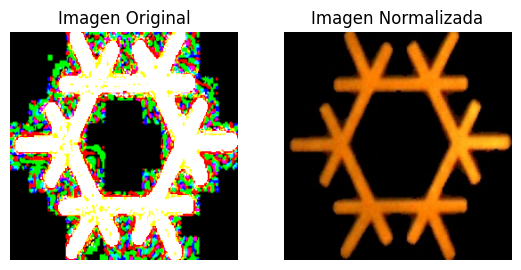

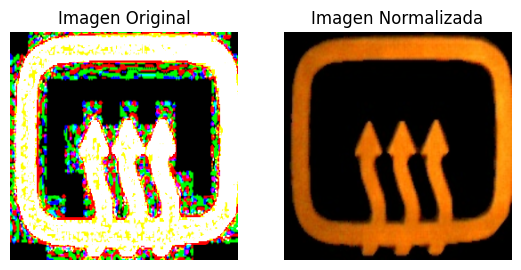

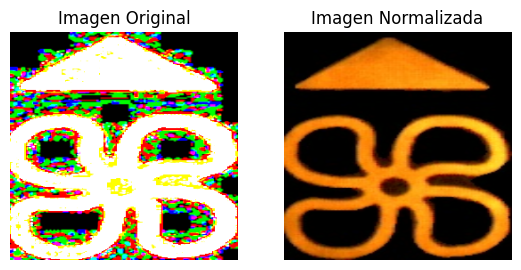

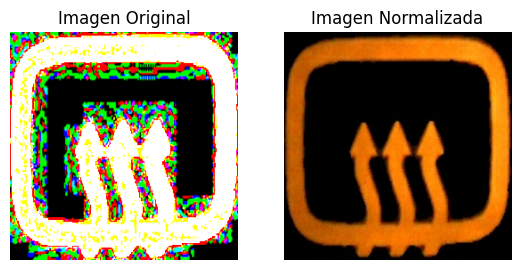

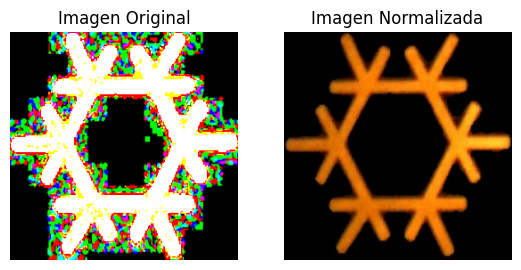

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

def normalizacion_imagenes(image):
    # Convertir la imagen a valores de punto flotante
    image_float = image.astype(np.float32)
    # Normalizar los valores de píxeles para que estén en el rango [0, 1]
    normalized_image = image_float / 255.0
    return normalized_image

for images, _ in train.take(1):
    for image in images:
        # Normalizar la imagen y almacenarla en una variable
        normalized_image = normalizacion_imagenes(image.numpy())

        # Visualizar la imagen original y la normalizada
        plt.figure(figsize=(10, 5))
        plt.subplot(1, 3, 1)
        plt.imshow(image)
        plt.title('Imagen Original')
        plt.axis('off')

        plt.subplot(1, 3, 2)
        plt.imshow(normalized_image)
        plt.title('Imagen Normalizada')
        plt.axis('off')


        plt.show()

# Conclusión

El análisis exploratorio de datos realizado como parte de una investigación en el campo del análisis de datos, específicamente centrado en un conjunto de imágenes de automóviles. A través de una serie de técnicas de análisis visual, se examinaron las características de las imágenes para obtener información valiosa sobre la distribución, resolución, clases, bordes y normalización de los píxeles.

*Distribución de Píxeles:*
Se investigó la distribución de los valores de píxeles en las imágenes para comprender la variabilidad de la intensidad de luz y contraste presentes en el conjunto de datos. Este análisis permitió identificar patrones significativos en la distribución de los valores de los píxeles, lo que proporcionó información valiosa sobre la calidad visual de las imágenes.

*Exploración de Resolución y Tamaño:*
Se llevó a cabo un análisis detallado de la resolución y el tamaño de las imágenes para evaluar la calidad y el detalle de cada imagen. Esta exploración proporcionó una comprensión más profunda de la complejidad visual del conjunto de datos y su impacto en el análisis y modelado subsiguientes.

*Variabilidad de Clases:*
Se examinó la distribución de clases en el conjunto de datos para comprender la variabilidad y el equilibrio entre las diferentes categorías de automóviles. Este análisis identificó desequilibrios potenciales en las clases, lo que resaltó la importancia de abordar estos desafíos en el análisis y modelado posteriores.

*Análisis de Bordes y Contornos:*
Se utilizó la detección de bordes y contornos para resaltar características distintivas en las imágenes de automóviles. Este análisis proporcionó una comprensión más profunda de las formas y estructuras presentes en los datos, lo que podría ser útil para tareas de detección de objetos y clasificación.

*Normalización de Píxeles:*
Se aplicó la normalización de los valores de los píxeles para asegurar que estuvieran en un rango común y manejable. Esta normalización estandarizó las entradas para los modelos de aprendizaje automático, mejorando así la estabilidad del entrenamiento y la capacidad de generalización del modelo.

Como conclusión, este análisis exploratorio de datos proporciona una comprensión detallada de las características visuales de las imágenes de automóviles y destaca áreas clave para futuras investigaciones y mejoras en el análisis de datos en el campo del análisis de datos.